https://finance.yahoo.com/calendar/earnings/?day=2024-01-05


/Users/saumikdana/Machine_Learning_Trading/data/scrape_url.py:28: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


Options data for STZ:
Average IV for Calls: 0.3166839038926541
Average IV for Puts: 0.2991075673851601
Total Call Volume: 8546.0
Total Call open interest: 29874.0
Total Call engagement: 38420.0
Total Put Volume: 5775.0
Total Put open interest: 20585
Total Put engagement: 26360.0
Number of ITM Call Options: 85
Number of ITM Put Options: 48
Data fetched for STZ, entries: 386


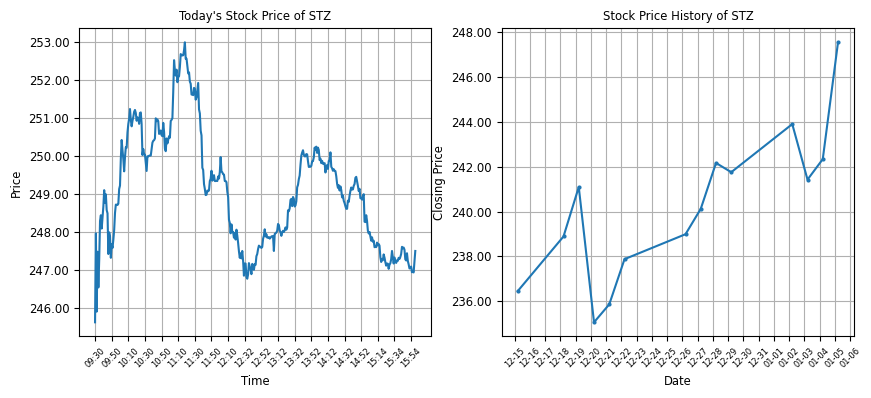

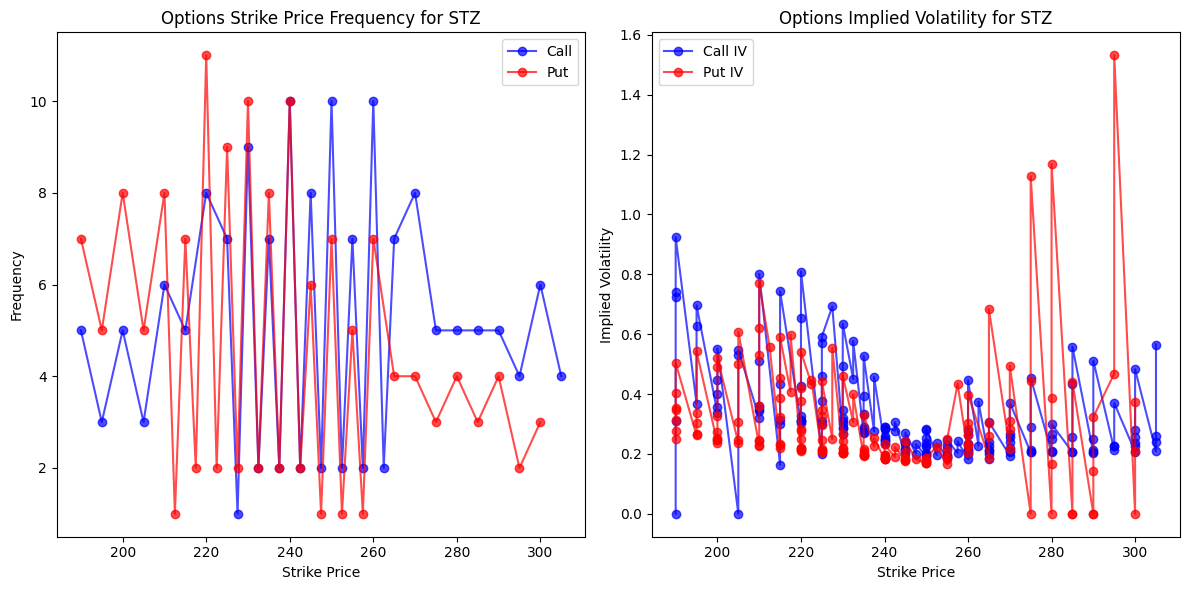

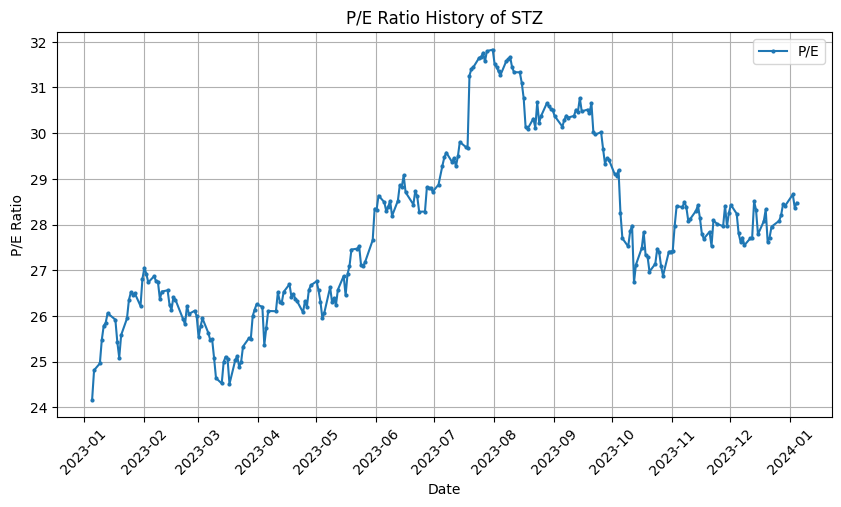

Options data for GBX:
Average IV for Calls: 0.5260064806224682
Average IV for Puts: 0.4895389022163723
Total Call Volume: 804.0
Total Call open interest: 3845
Total Call engagement: 4649.0
Total Put Volume: 949.0
Total Put open interest: 2909
Total Put engagement: 3858.0
Number of ITM Call Options: 16
Number of ITM Put Options: 7
Data fetched for GBX, entries: 327


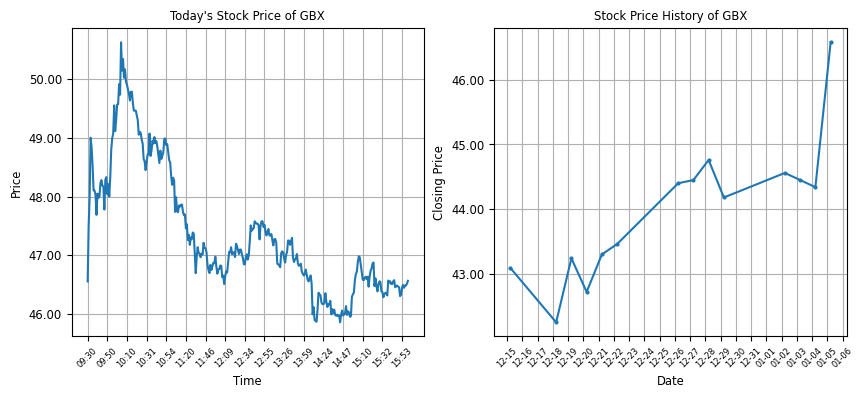

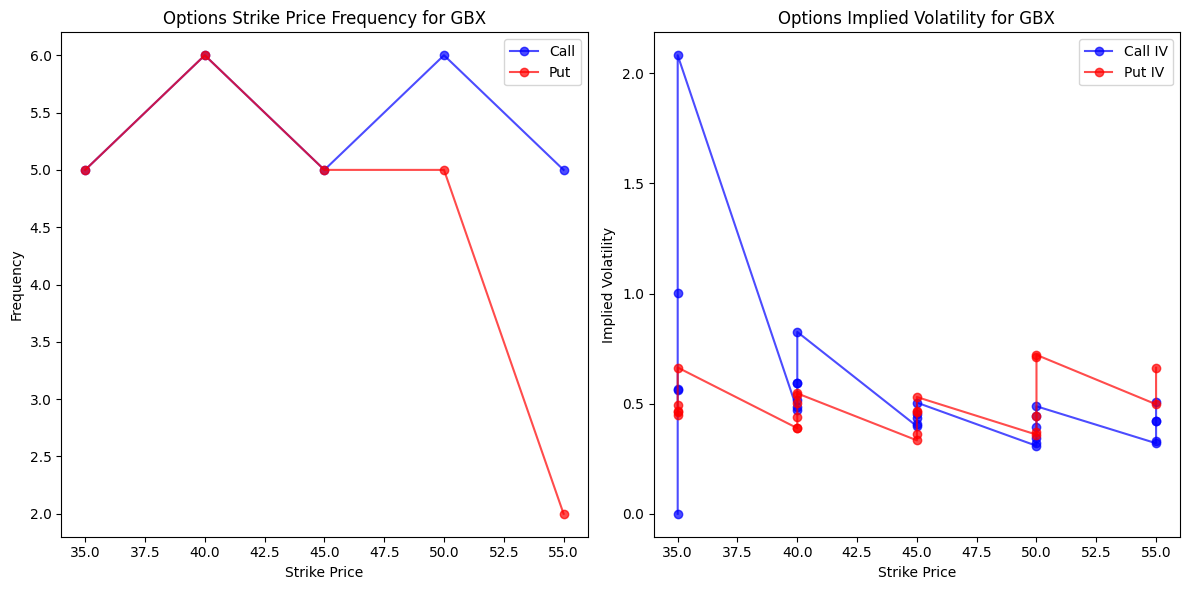

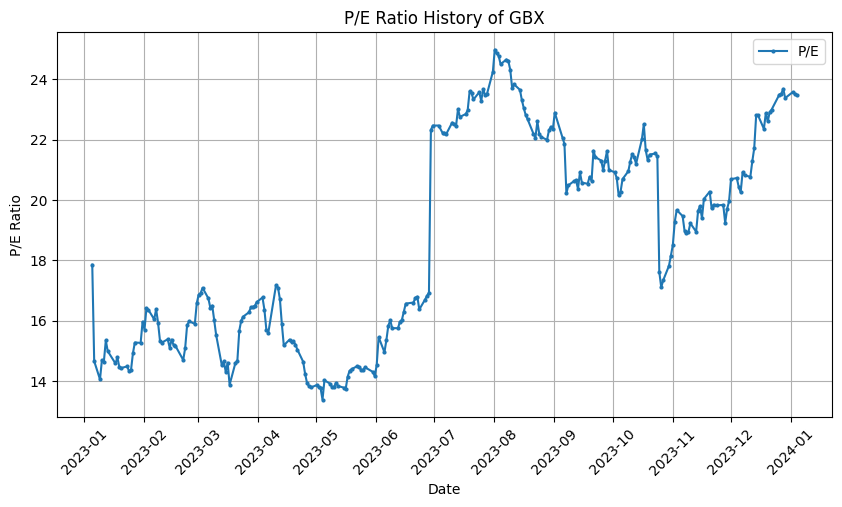

Options data for INSE:
Average IV for Calls: 0.9981717529296875
Average IV for Puts: 1.0395544799804688
Total Call Volume: 477.0
Total Call open interest: 7648
Total Call engagement: 8125.0
Total Put Volume: 28.0
Total Put open interest: 90.0
Total Put engagement: 118.0
Number of ITM Call Options: 4
Number of ITM Put Options: 1
Data fetched for INSE, entries: 91


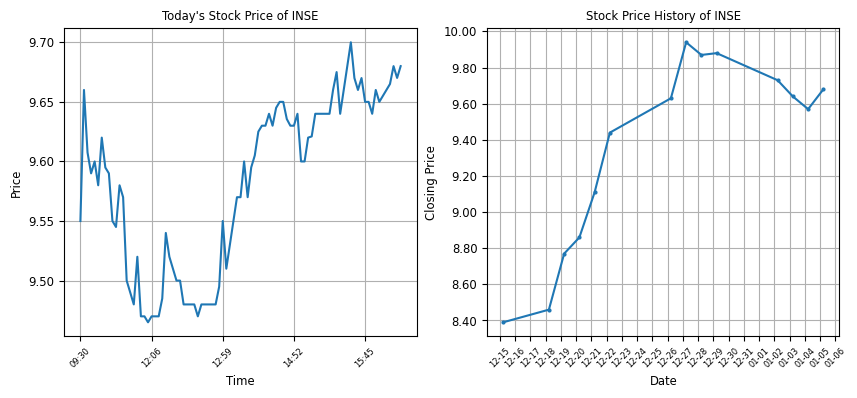

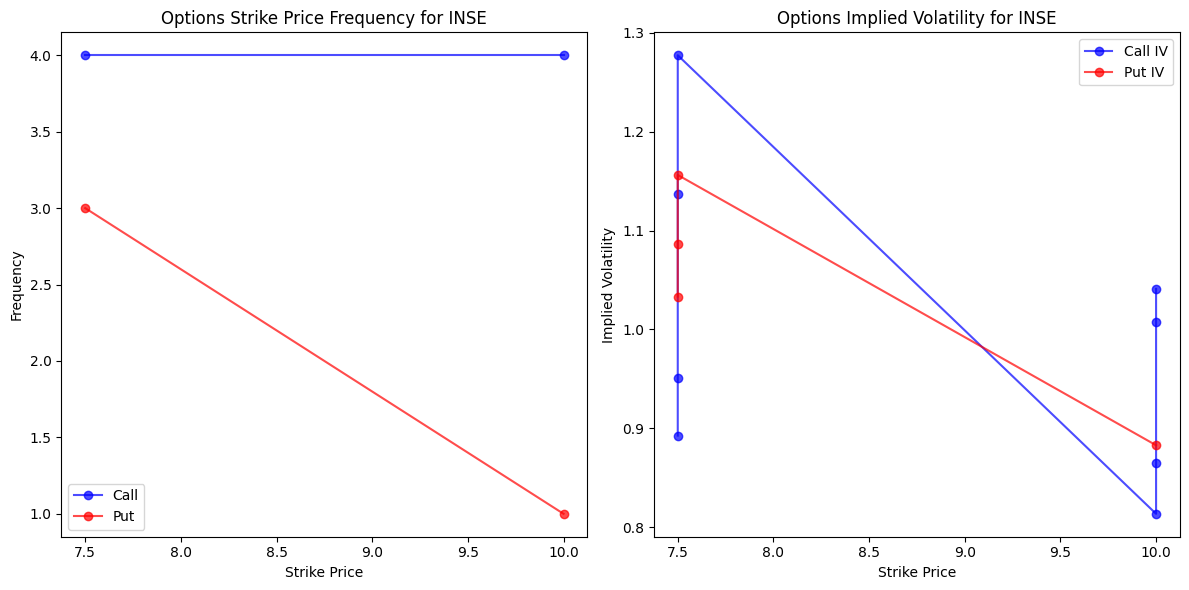

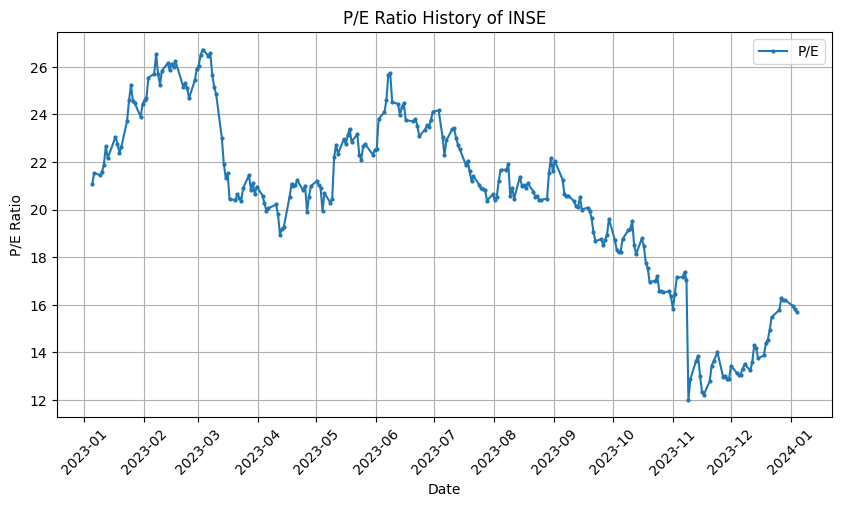

Options data for ANGO:
Average IV for Calls: 1.0157673451450893
Average IV for Puts: 0.68945623046875
Total Call Volume: 213.0
Total Call open interest: 285
Total Call engagement: 498.0
Total Put Volume: 248.0
Total Put open interest: 356.0
Total Put engagement: 604.0
Number of ITM Call Options: 3
Number of ITM Put Options: 1
Data fetched for ANGO, entries: 386


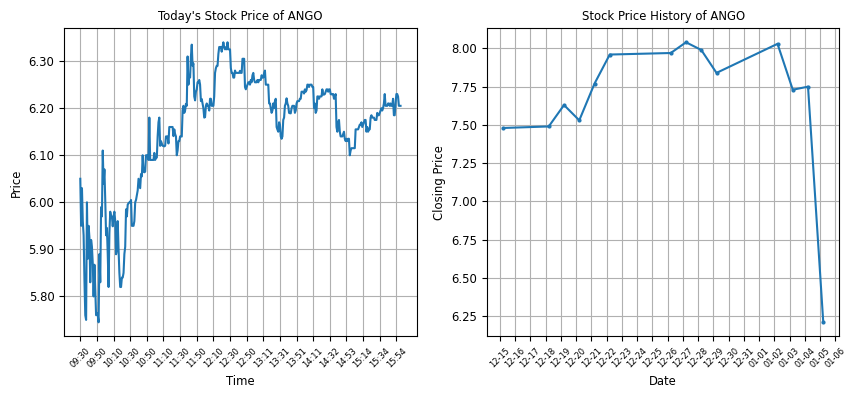

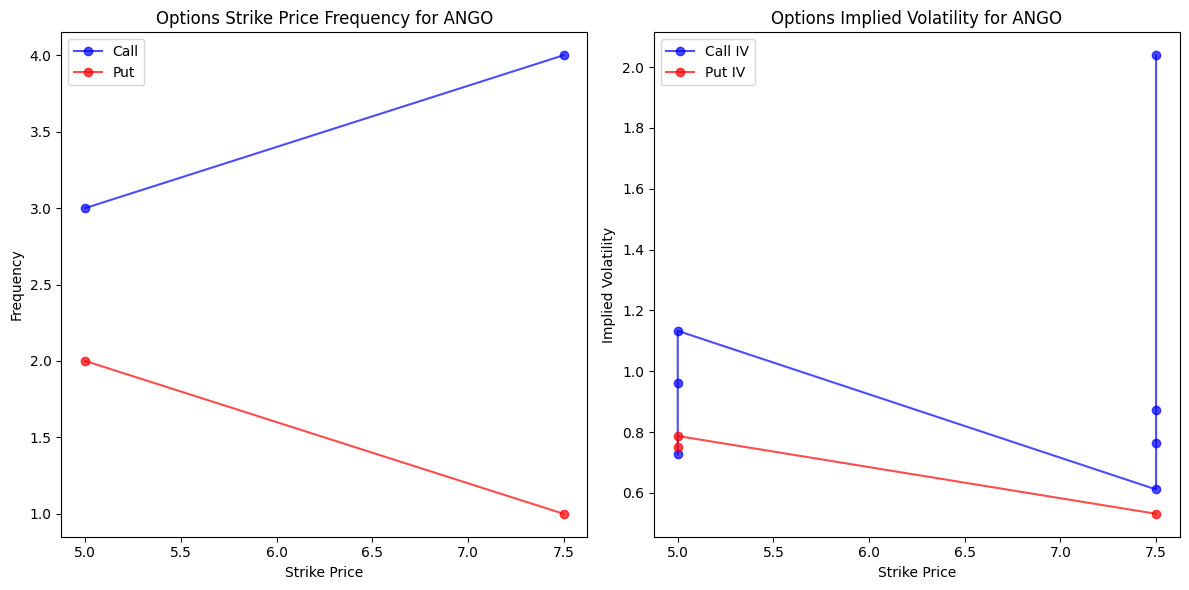

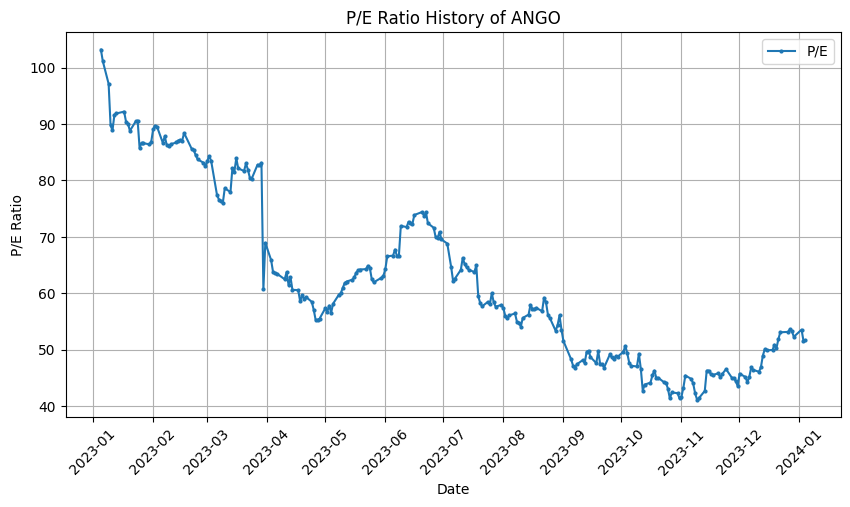

Options data for XELA:
Average IV for Calls: 1.6293004873046875
Average IV for Puts: 1.0881380749511718
Total Call Volume: 21.0
Total Call open interest: 235
Total Call engagement: 256.0
Total Put Volume: 128.0
Total Put open interest: 10485
Total Put engagement: 10613.0
Number of ITM Call Options: 7
Number of ITM Put Options: 2
Data fetched for XELA, entries: 118


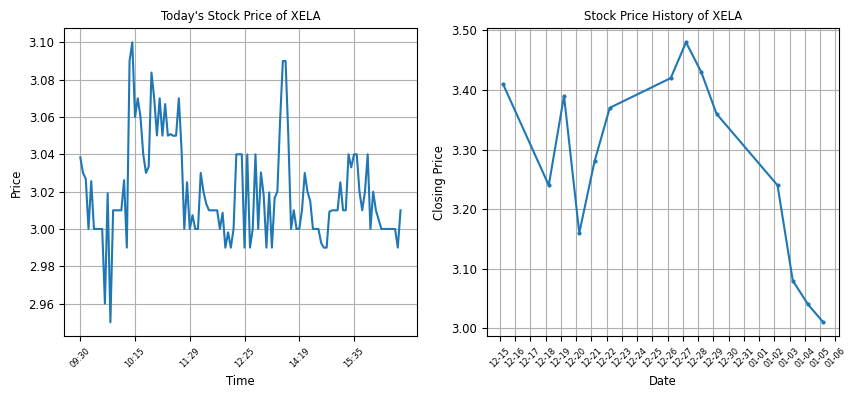

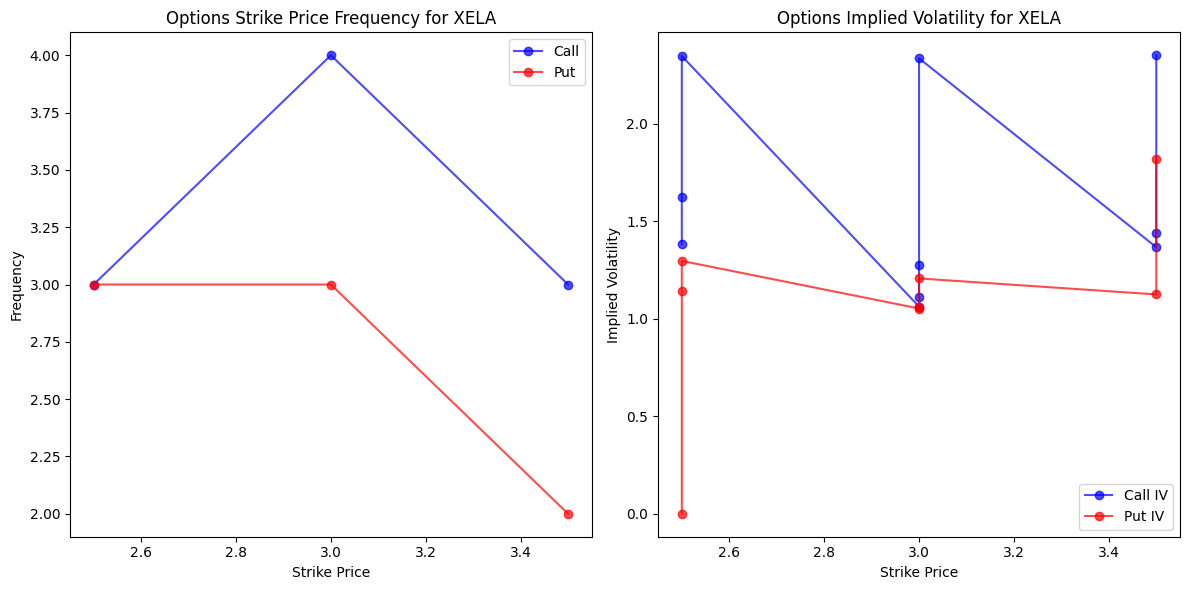

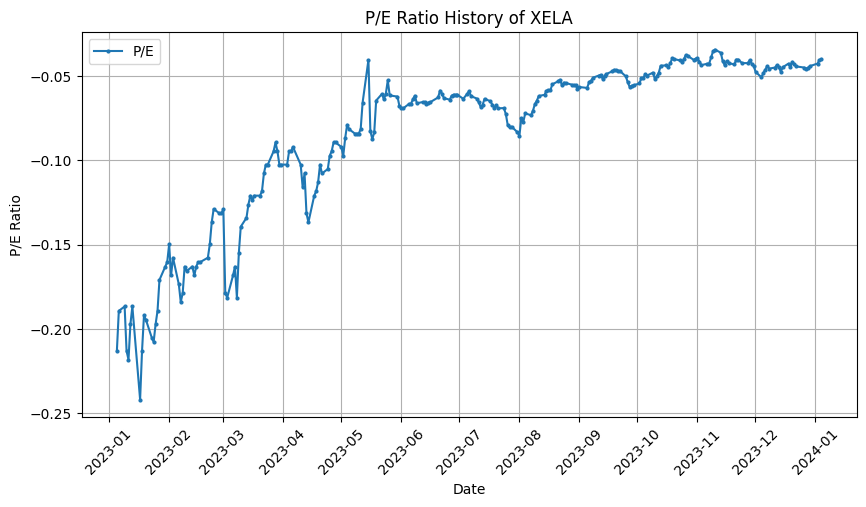

In [1]:
from datetime import datetime, timedelta
from analyze_stock import *  
from scrape_url import *

# Call the function and store the result
day = '2024-01-05'
date = datetime.strptime(day, '%Y-%m-%d')

# Set the time frame
end_date = date + timedelta(days=7)
start_date = date - timedelta(days=21)

# First page
url = 'https://finance.yahoo.com/calendar/earnings/?day=' + day
print(url)

ticker_data_list = process_earnings_table(extract_table(url))
    
# Second page
url += '&offset=100&size=100'

ticker_data_list = process_earnings_table(extract_table(url), ticker_data_list)

# Pandas Dataframe
ticker_data_sorted = convert_to_dataframe(ticker_data_list)

filtered_tickers = []

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']
    
    if ticker in filtered_tickers:
        continue

    # Use the function from utils.py to analyze stock options
    options_metrics = analyze_stock_options(ticker)
    
    if options_metrics['total_itm_calls'] == 0 and options_metrics['total_itm_puts'] == 0:
        continue

    # Get All Analysis
    get_info(ticker, options_metrics, start_date, end_date)
    
    # P/e ratio
    plot_pe_ratio(ticker, date)

    # Filtered tickers
    filtered_tickers.append(ticker)
    
del filtered_tickers, ticker_data_list, ticker_data_sorted